In [11]:
# Importar las librerías necesarias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

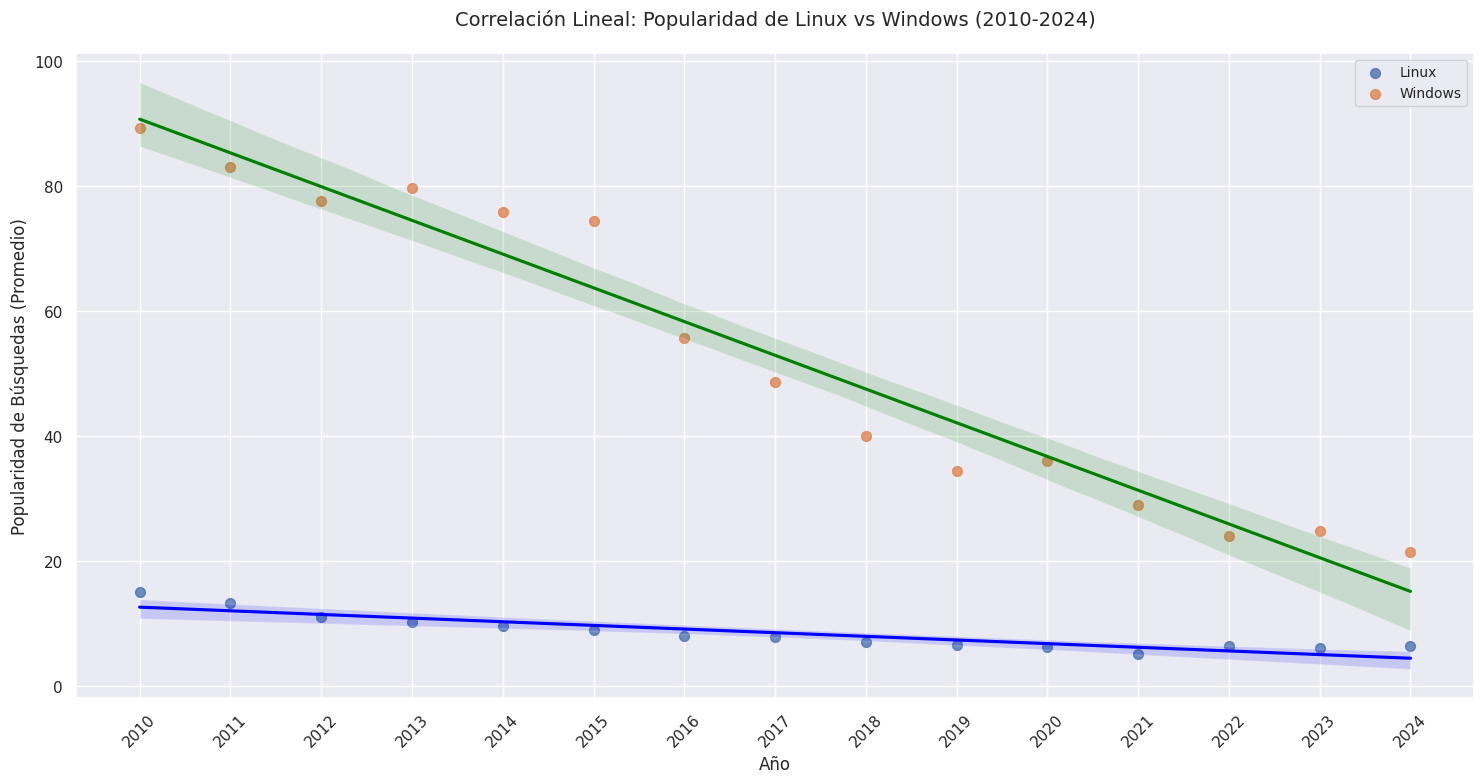


Correlación entre Linux y Windows: 0.91


In [12]:


# Configurar el estilo de Seaborn
sns.set_theme(style="darkgrid")

# Cargar el archivo Excel
data_excel = pd.read_excel('/content/grafica/multiTimeline-_4_.xlsx')

# Convertir la columna 'Mes' a datetime
data_excel['Mes'] = pd.to_datetime(data_excel['Mes'])

# Crear un nuevo DataFrame con los valores necesarios para el gráfico
data_excel['Año'] = data_excel['Mes'].dt.year  # Extraer el año
data_excel_grouped = data_excel.groupby('Año').mean().reset_index()  # Promediar por año

# Crear el gráfico de correlación lineal
plt.figure(figsize=(15, 8))
sns.regplot(
    x=data_excel_grouped['Año'],
    y=data_excel_grouped['Linux: (Todo el mundo)'],
    label='Linux',
    scatter_kws={'s': 50},  # Tamaño de los puntos
    line_kws={'color': 'blue'},  # Color de la línea
)
sns.regplot(
    x=data_excel_grouped['Año'],
    y=data_excel_grouped['Microsoft Windows: (Todo el mundo)'],
    label='Windows',
    scatter_kws={'s': 50},
    line_kws={'color': 'green'},
)

# Configurar el gráfico
plt.title('Correlación Lineal: Popularidad de Linux vs Windows (2010-2024)',
          fontsize=14, pad=20)
plt.xlabel('Año', fontsize=12)
plt.ylabel('Popularidad de Búsquedas (Promedio)', fontsize=12)
plt.legend(fontsize=10)
plt.xticks(data_excel_grouped['Año'], rotation=45)
plt.tight_layout()

# Mostrar el gráfico
plt.show()

# Calcular la correlación
correlation = data_excel_grouped['Linux: (Todo el mundo)'].corr(
    data_excel_grouped['Microsoft Windows: (Todo el mundo)']
)
print(f"\nCorrelación entre Linux y Windows: {correlation:.2f}")
